Heart Disease Predicition based on Personal Key Indicators Exploratory Data Analysis, Pre processing and Data Cleaning

Telephonic Interview:

HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI). It collects categorical data: yes or no 

BMI : Body Mass Index (BMI). 

Smoking : Have you smoked at least 100 cigarettes in your entire life? The answer Yes or No. 

AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week, it is a Yes or No question.

Stroke : If the respondent ever had  a stroke? It is a Yes or No question.

PhysicalHealth : The respondent is asked to rate their physical wellbeing based on physical illness and injury, and for how many days during the past 30 days was their physical health not good? (0-30 days).

MentalHealth : The respondent is asked to rate their mental wellbeing based on their mental situation, including undergoing therapies, and for how many days during the past 30 days was their mental health not good? (0-30 days)

DiffWalking : The respondants are asked if they had difficult walking. It is a Yes or No question.

Sex : Are you male or female? 

AgeCategory: The respondant is put in one of the different categories.

Race : Imputed race/ethnicity value. 

Diabetic : If the respondant has ever been diagnosed with daibetes? 

PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job. 

GenHealth : A rating based on good, very good or not good. 

SleepTime : The respndents answers about how many hours of sleep do they get in a 24-hour period? 

Asthma : The repondents are asked about whether they have asthma? It is a Yes or No question.

KidneyDisease :  The repondents are asked about whether they have kidney diseases? It is a Yes or No question.

SkinCancer : The repondents are asked about whether they have skin cancer? It is a Yes or No question.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mn

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
plt.style.use('fivethirtyeight') 
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [14]:
data = pd.read_csv("heart_2020_cleaned.csv")
data.head(5)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Data Pre-processing and Cleaning

In [28]:
data.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [29]:
data.shape

(319795, 18)

In [30]:
print(data.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [31]:
data.groupby("HeartDisease").median()

BMI  PhysicalHealth  MentalHealth  SleepTime
HeartDisease                                                
No            27.26             0.0           0.0        7.0
Yes           28.34             0.0           0.0        7.0

In [32]:
# To know how data are related to each other
data.corr()

BMI  PhysicalHealth  MentalHealth  SleepTime
BMI             1.000000        0.109788      0.064131  -0.051822
PhysicalHealth  0.109788        1.000000      0.287987  -0.061387
MentalHealth    0.064131        0.287987      1.000000  -0.119717
SleepTime      -0.051822       -0.061387     -0.119717   1.000000

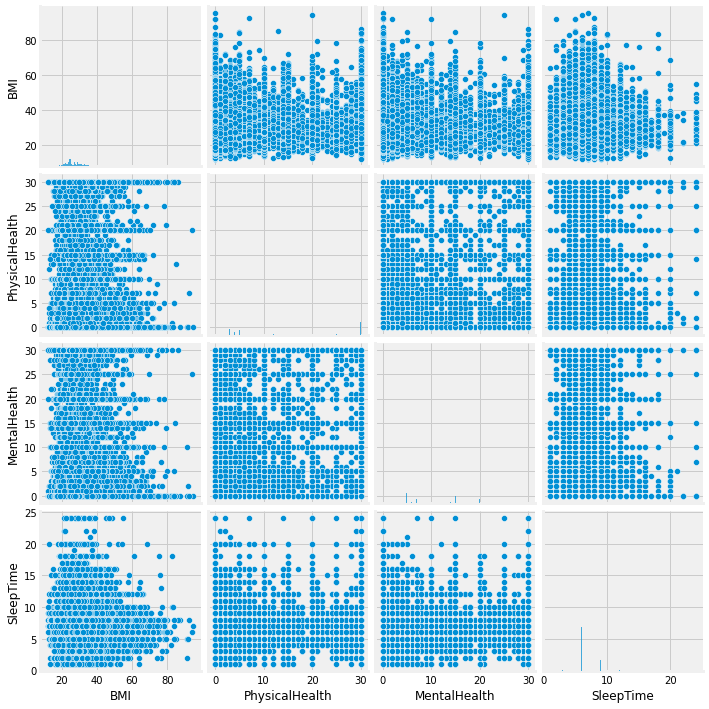

In [10]:
#visualization for seeing the correlation
sns.pairplot(data)

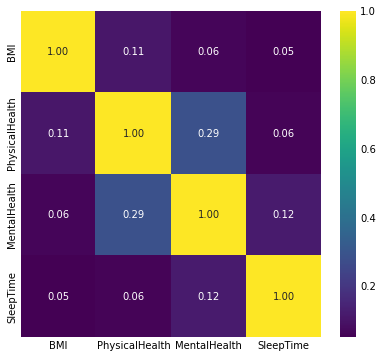

In [21]:
plt.figure(figsize=(6,6))
sns.heatmap(np.abs(data.corr()), annot = True, cmap = "viridis", fmt = "0.2f")

Mental Health versus Physical Health

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'PhysicalHealth')

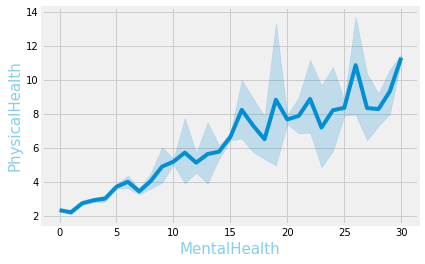

In [22]:
X = data["MentalHealth"].values
Y = data["PhysicalHealth"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("MentalHealth", fontsize = 15,color="skyblue")
line_plot.set_ylabel("PhysicalHealth", fontsize = 15,color="skyblue")

Mental Health versus SleepTime

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'SleepTime')

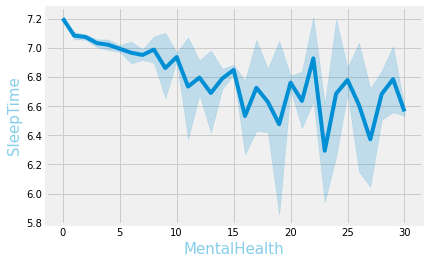

In [23]:
X = data["MentalHealth"].values
Y = data["SleepTime"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("MentalHealth", fontsize = 15,color="skyblue")
line_plot.set_ylabel("SleepTime", fontsize = 15,color="skyblue")

Physical Health versus Sleep


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'SleepTime')

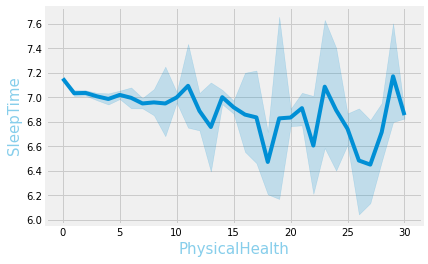

In [24]:
X = data["PhysicalHealth"].values
Y = data["SleepTime"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("PhysicalHealth", fontsize = 15,color="skyblue")
line_plot.set_ylabel("SleepTime", fontsize = 15,color="skyblue")

Effects of other attributes on Heart Disease

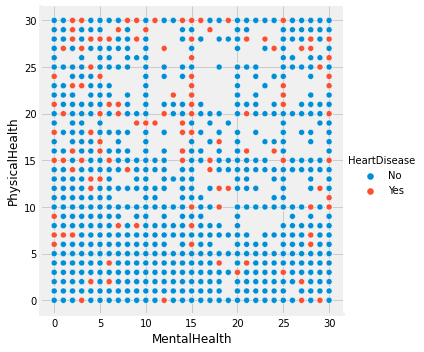

In [25]:
sns.relplot(x="MentalHealth",y="PhysicalHealth", data=data, hue="HeartDisease")

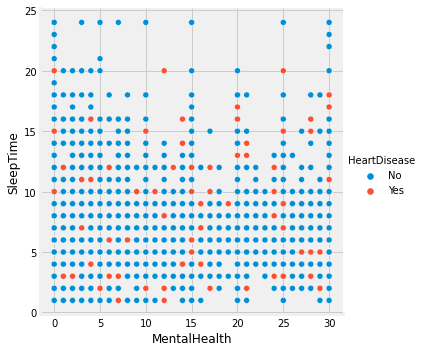

In [26]:
sns.relplot(x="MentalHealth",y="SleepTime", data=data, hue="HeartDisease")

Smoking versus Heart Disease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'HeartDisease')

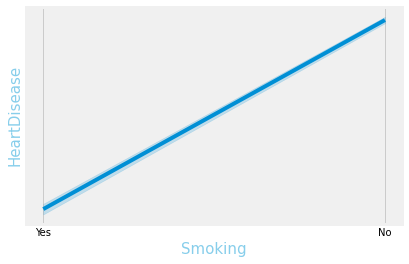

In [33]:
X = data["Smoking"].values
Y = data["HeartDisease"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("Smoking", fontsize = 15,color="skyblue")
line_plot.set_ylabel("HeartDisease", fontsize = 15,color="skyblue")

Alcohol Drinking versus Heart Disease

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'HeartDisease')

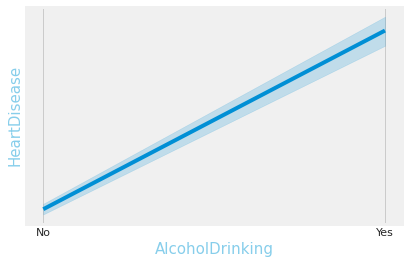

In [ ]:
X = data["AlcoholDrinking"].values
Y = data["HeartDisease"].values
line_plot = sns.lineplot(X,Y)
line_plot.set_xlabel("AlcoholDrinking", fontsize = 15,color="skyblue")
line_plot.set_ylabel("HeartDisease", fontsize = 15,color="skyblue")

Exploratory Data Analysis

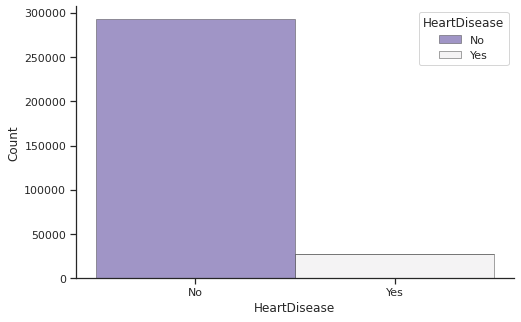

In [34]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (7,5))
sns.despine(f)
sns.histplot(
    data, x= "HeartDisease", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.5"
)

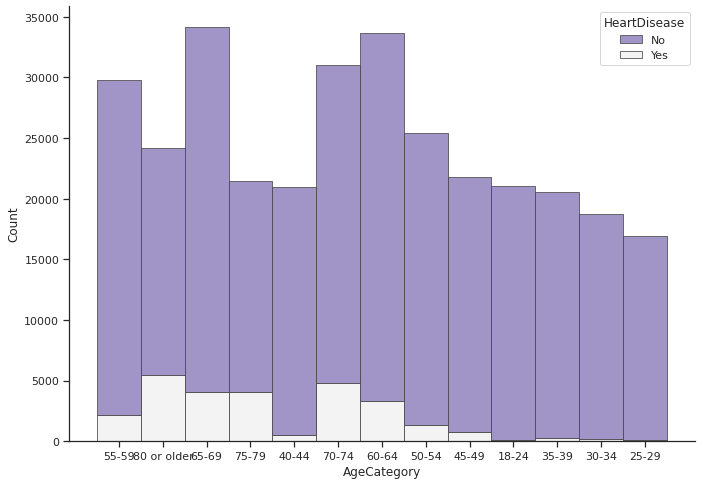

In [35]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "AgeCategory", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

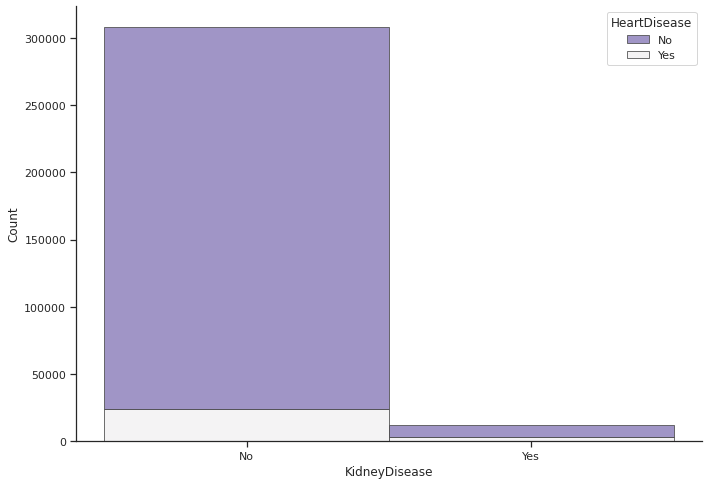

In [36]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "KidneyDisease", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

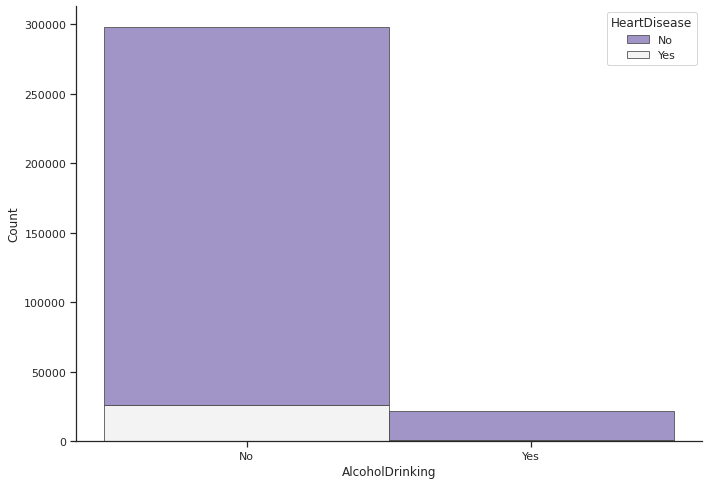

In [37]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "AlcoholDrinking", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

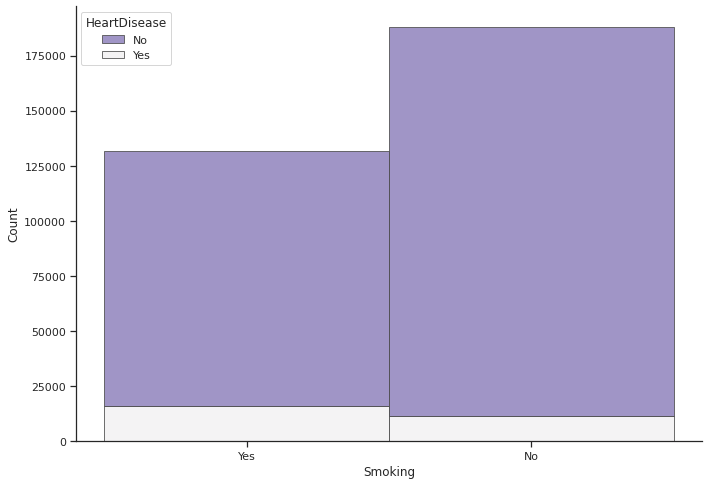

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize = (10,8))
sns.despine(f)
sns.histplot(
    data, x= "Smoking", hue = "HeartDisease",
    multiple="stack",palette="light:m_r",
    edgecolor = "0.3",
    linewidth="0.8"
)

Age Category versus BMI

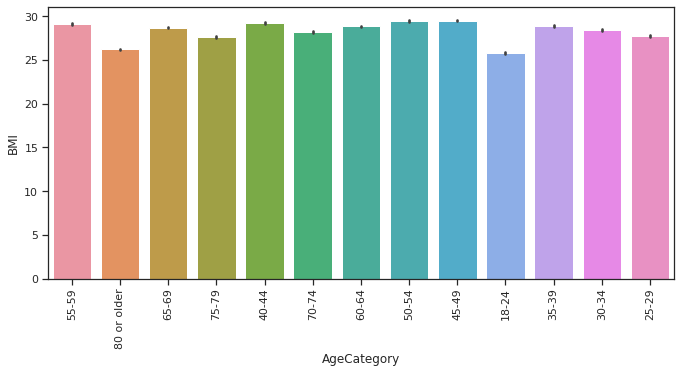

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x= data['AgeCategory'],y= data['BMI'])
plt.xticks(rotation=90)
plt.show()

Physical Health versus BMI

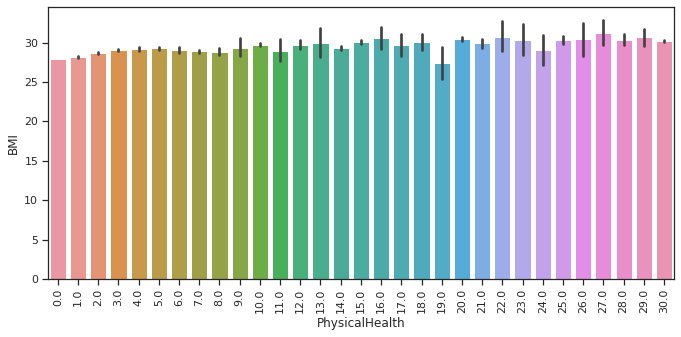

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x= data['PhysicalHealth'],y= data['BMI'])
plt.xticks(rotation=90)
plt.show()

Mental Health versus BMI

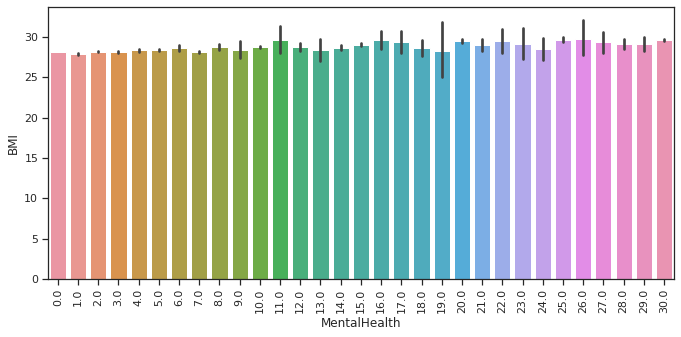

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x= data['MentalHealth'],y= data['BMI'])
plt.xticks(rotation=90)
plt.show()

Correlation Function

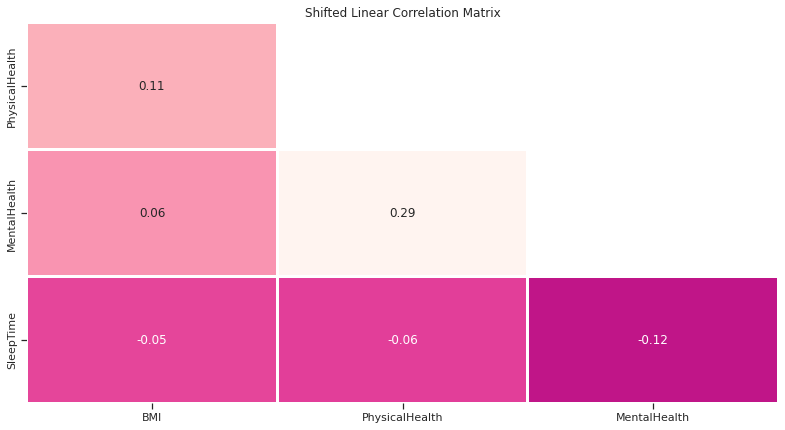

In [38]:
#Correlation function
def corrMat(data,id=False):
    
    corr_mat = data.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0, 
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim() 
#     ax.set_ylim(bottom + 0.5, top - 0.5) 
    ax.set_title('Shifted Linear Correlation Matrix')
    
corrMat(data.drop(['HeartDisease'],axis = 1))

Statistics

In [39]:
#Statistics
data.describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

Features Correlation on Train Dataset

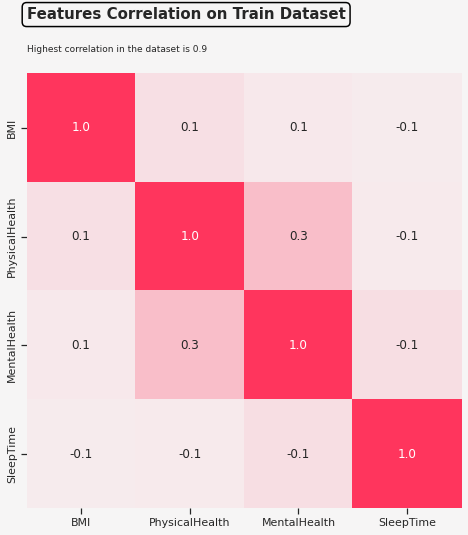

In [40]:
#Correlation 
background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -0.5, 'Features Correlation on Train Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.2, 'Highest correlation in the dataset is 0.9', fontsize=9, fontweight='light')

sns.heatmap(data.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')
plt.show()

Categorical Features: HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

Continuous Features: BMI, PhysicalHealtH, MentalHealth, AgeCategory, SleepTime

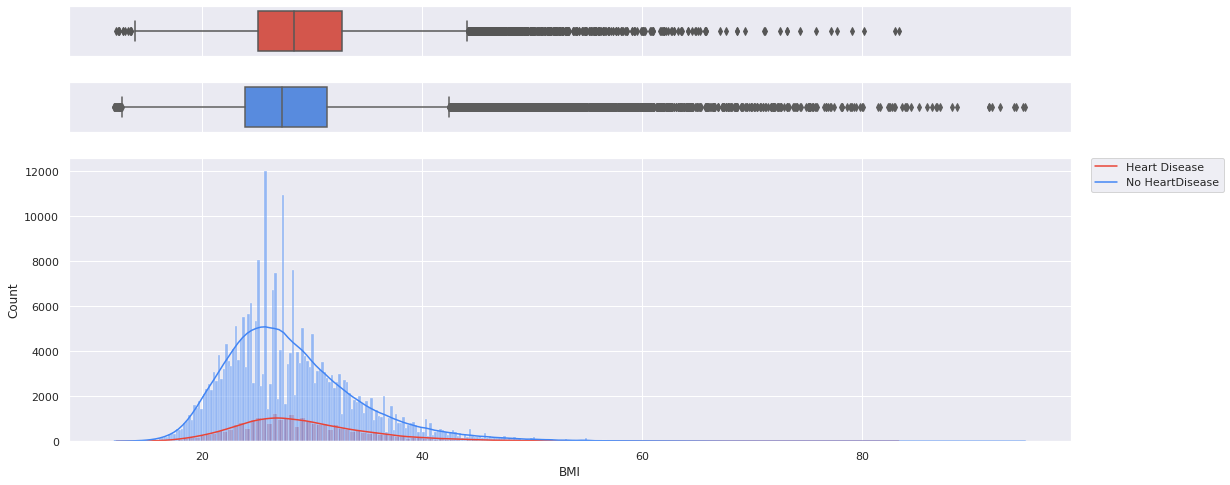

In [ ]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})
 
# creating a figure composed of 3 matplotlib.Axes objects
f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
# assigning a graph to each ax
sns.boxplot(x=data[data['HeartDisease']=='Yes']["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(data[data['HeartDisease']=='Yes'], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=data[data['HeartDisease']=='No']["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(data[data['HeartDisease']=='No'], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
# Remove x axis name for the boxplots
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No HeartDisease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

People found to have heart disease, skin cancer & kidney disease are mostly old people

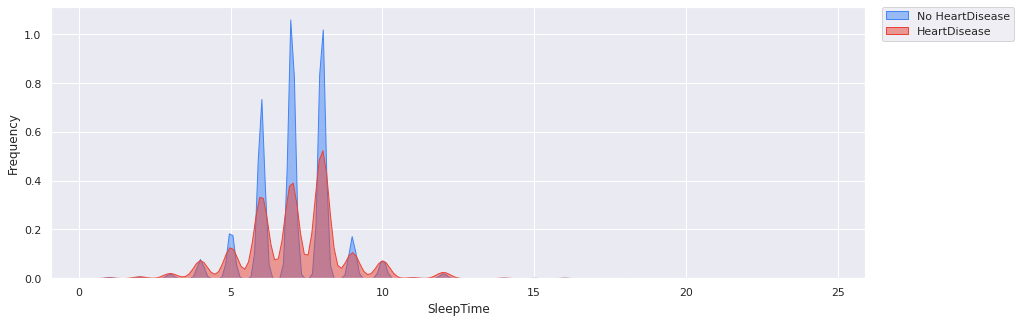

In [ ]:
#People found to have heart disease, skin cancer & kidney disease are mostly old people
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(data[data["HeartDisease"]=='No']["SleepTime"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]=='Yes']["SleepTime"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

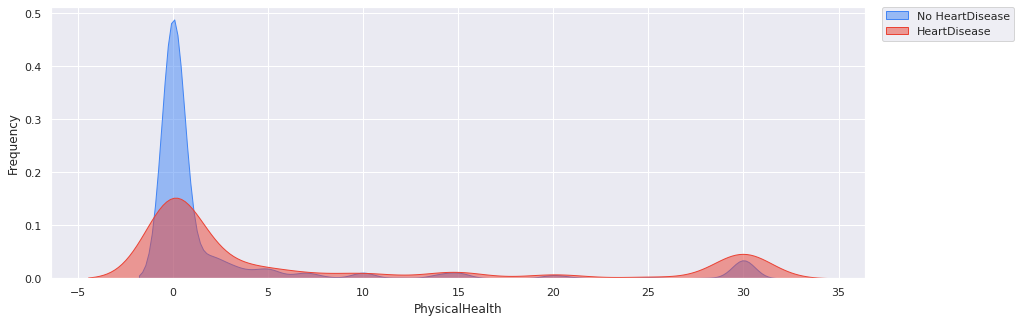

In [ ]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(data[data["HeartDisease"]=='No']["PhysicalHealth"], alpha=0.5,shade = True, color="#4285f4", label="No HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]=='Yes']["PhysicalHealth"], alpha=0.5,shade = True, color="#ea4335", label="HeartDisease", ax = ax)
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

Visualization of Categorical Data

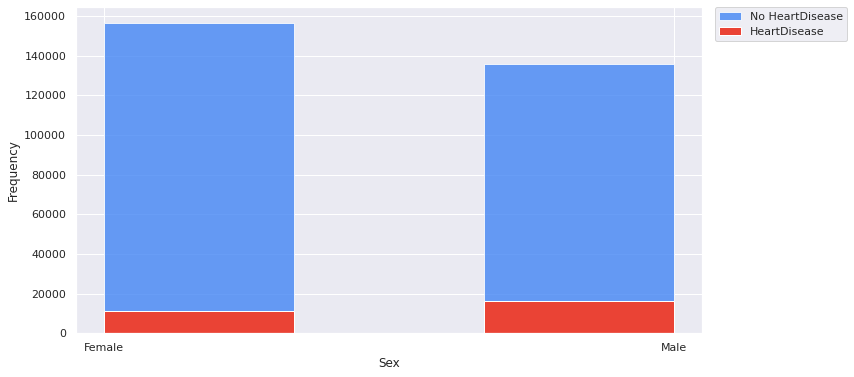

In [ ]:
#Visualization of Categorical Data
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["Sex"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Sex"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
female_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Female')])
num_female = len(data[data['Sex']=='Female'])
male_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Sex']=='Male')])
num_male = len(data[data['Sex']=='Male'])
print('Probability of Male to have Heart disease:', male_with_heart_disease/num_male)
print('Probability of Female to have Heart disease:', female_with_heart_disease/num_female)

Probability of Male to have Heart disease: 0.10618461740904007
Probability of Female to have Heart disease: 0.06694675367241738


Most heart disease patients are Male than Females More Females were tested than males Males are approximately 1.6 times more likely to have heart disease than females

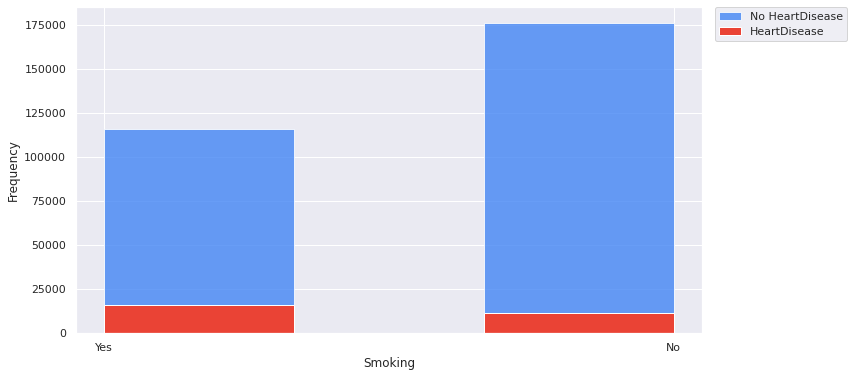

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='Yes')])
num_smoke = len(data[data['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='No')])
num_no_smoke = len(data[data['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke_and_heart_disease/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke_and_heart_disease/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


Most heart disease patients smoke
People who smoke are approximately twice as likely to have heart disease than people who don't smoke

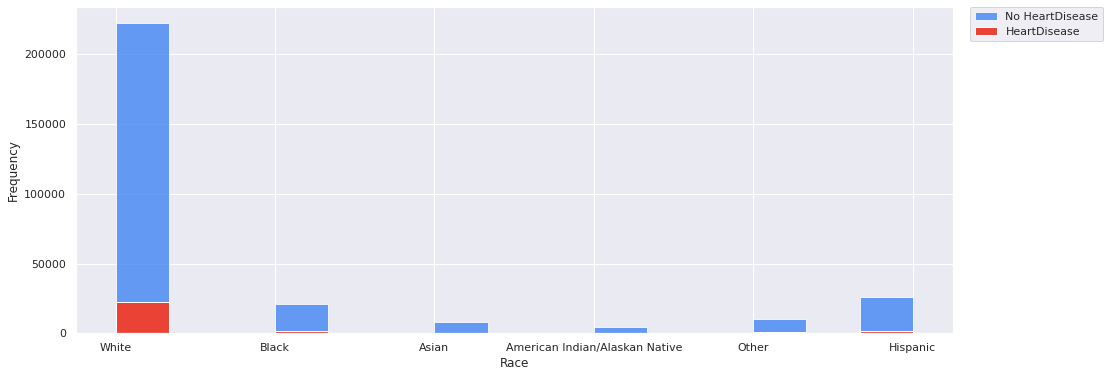

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))

ax.hist(data[data["HeartDisease"]=='No']["Race"], bins=15, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Race"], bins=15, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Race")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

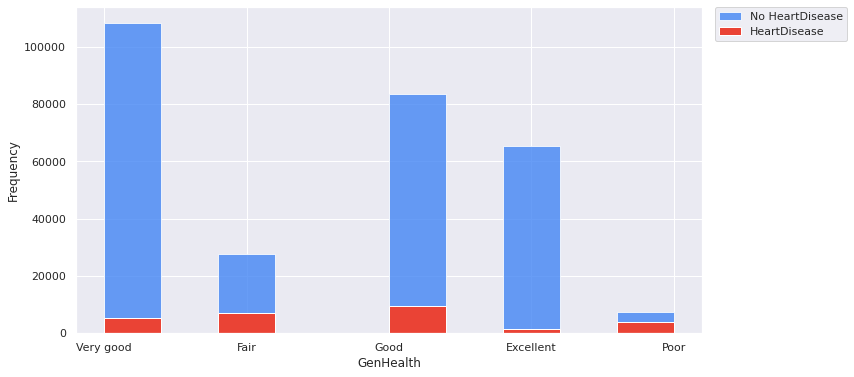

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["GenHealth"], bins=10, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["GenHealth"], bins=10, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

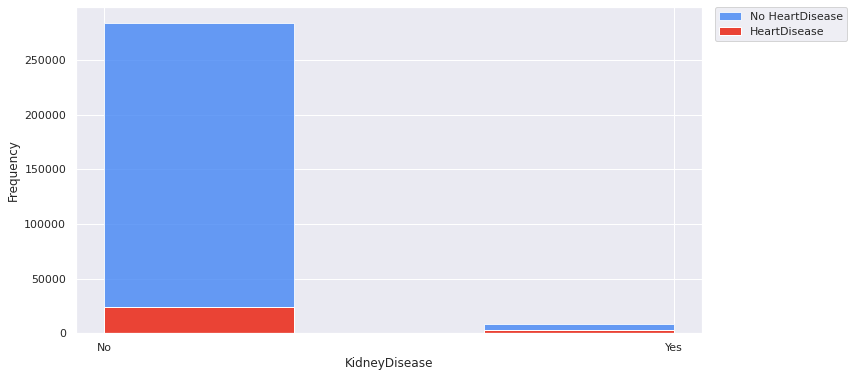

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["KidneyDisease"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["KidneyDisease"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Most of the people tested have no kidney disease

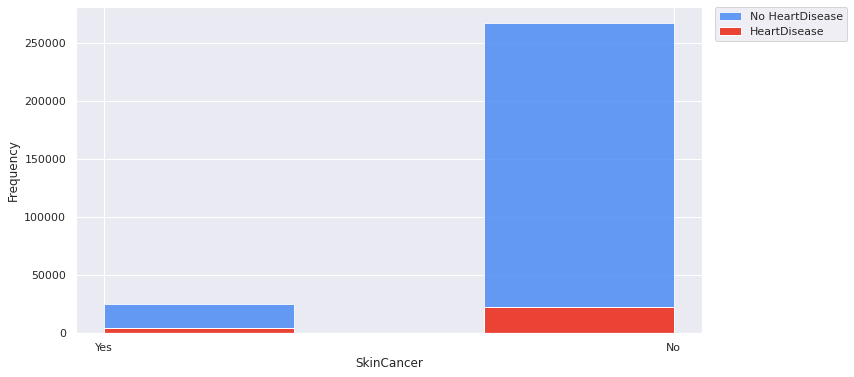

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["SkinCancer"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["SkinCancer"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

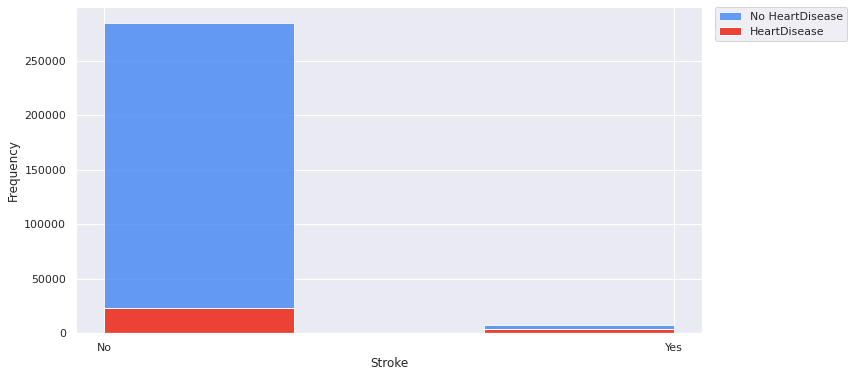

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["Stroke"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Stroke"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Text(0, 0.5, 'Frequency')

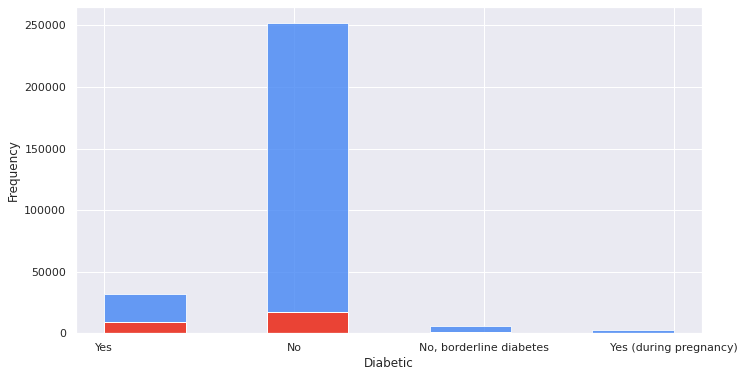

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["Diabetic"], bins=7, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Diabetic"], bins=7, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

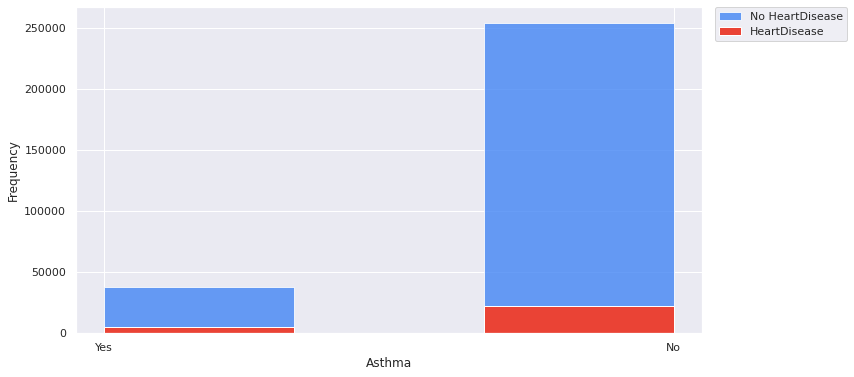

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["Asthma"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Asthma"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Asthma")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

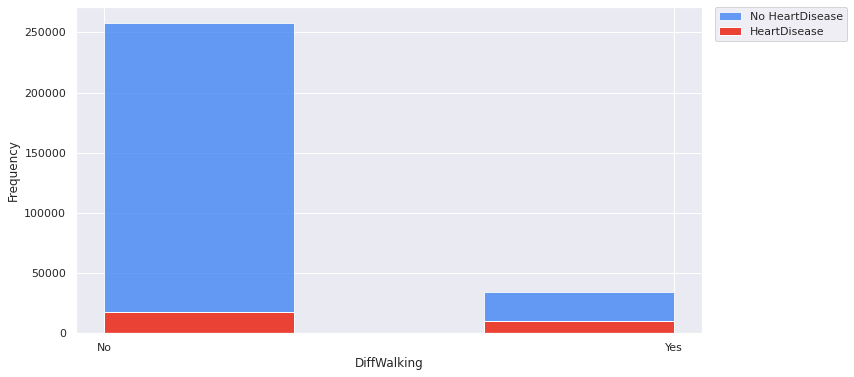

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["DiffWalking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["DiffWalking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("DiffWalking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

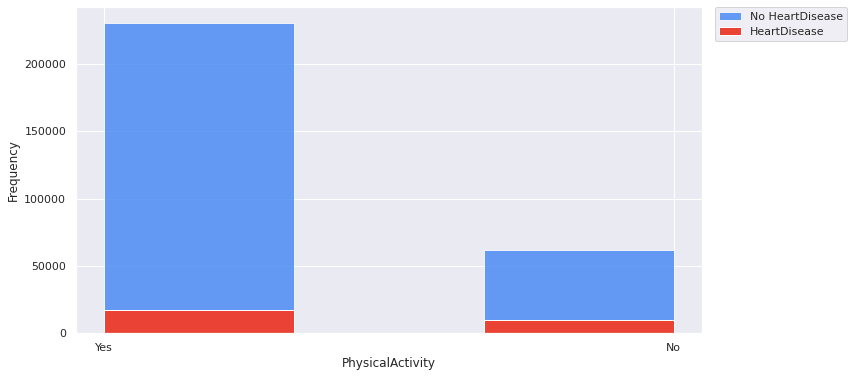

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")
 
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

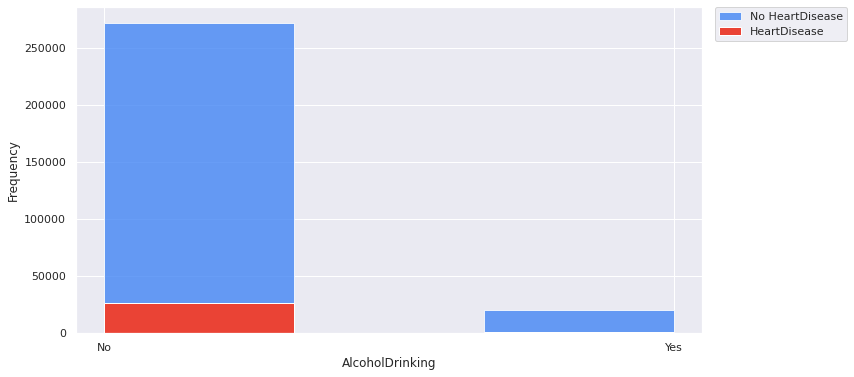

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(data[data["HeartDisease"]=='No']["AlcoholDrinking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["AlcoholDrinking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("AlcoholDrinking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

Data Cleaning & Preprocessing

In [ ]:
print('Continuous Columns')
data.select_dtypes(include=['float']).describe().T[['min', 'mean', 'max']].style.background_gradient(cmap='Blues')

Continuous Columns


The range of continuous features are different. Scaling be in-between 0 to 1 by dividing by the maximum value of the respective columns

In [ ]:
print('\nCategorical Columns\n')
data.select_dtypes(include=['O']).nunique()


Categorical Columns



HeartDisease         2
Smoking              2
AlcoholDrinking      2
Stroke               2
DiffWalking          2
Sex                  2
AgeCategory         13
Race                 6
Diabetic             4
PhysicalActivity     2
GenHealth            5
Asthma               2
KidneyDisease        2
SkinCancer           2
dtype: int64

Some categorical columns have 2 values, and some have more than 2 values like the AgeCategory, Race, Diabetic and GenHealth.
For columns with 2 unique values, we use 1 or 2 and for categorical columns with more than 2 unique values, we use One-Hot Encoder. 

In [ ]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

The dataset is not balanced, there is way more number of samples for people who have no Heart Disease than people with Heart Disease. This can be fixed by oversampling the data

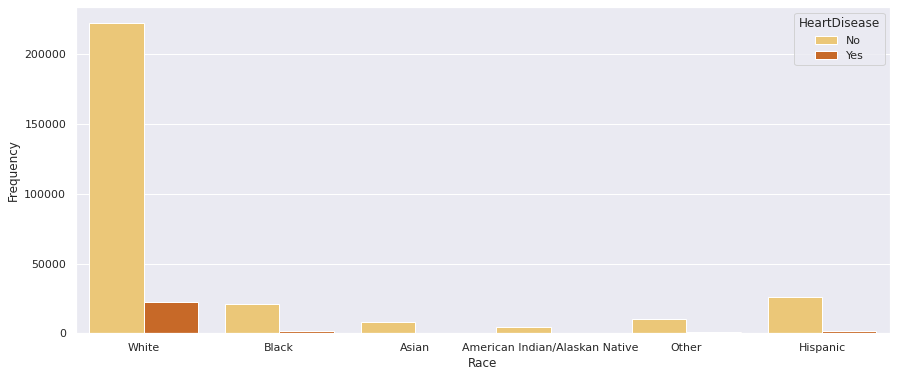

In [ ]:
plt.figure(figsize = (13,6))
sns.countplot( x= data['Race'], hue = 'HeartDisease', data = data, palette = 'YlOrBr')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

1 refers to heartdisease. 0 refers to normal state. We can see that white people are more susceptible to heart disease.

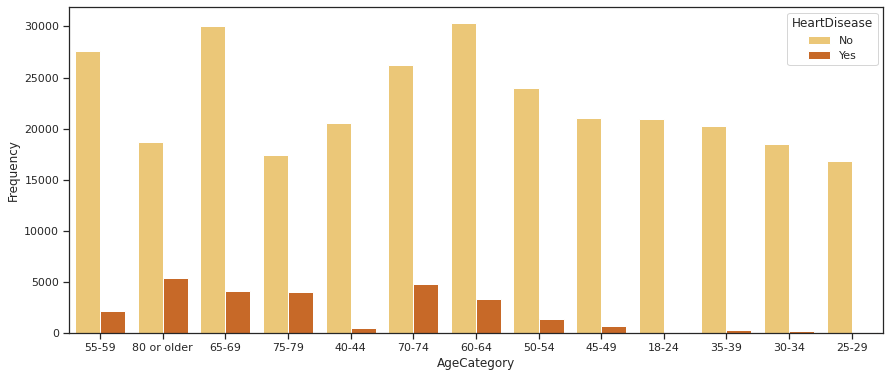

In [41]:
plt.figure(figsize = (13,6))
sns.countplot(x = data['AgeCategory'], hue = 'HeartDisease', data = data, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

People above the age of 60 are more susceptible to have heart diseases

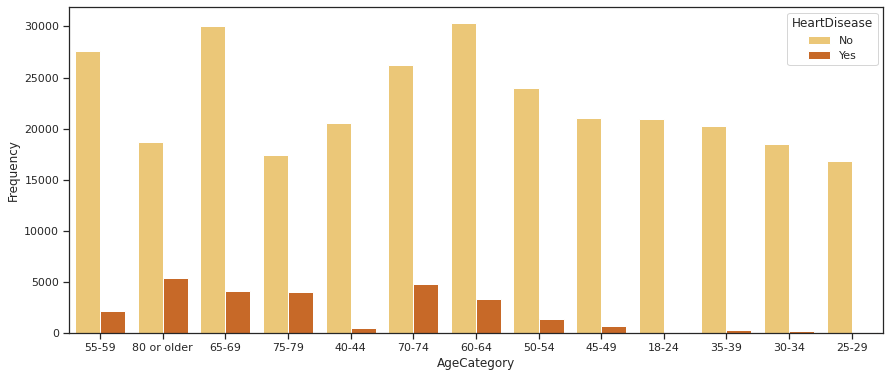

In [42]:
plt.figure(figsize = (13,6))
sns.countplot(x = data['AgeCategory'], hue = 'HeartDisease', data = data, palette = 'YlOrBr')
fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.ylabel('Frequency')
plt.show()

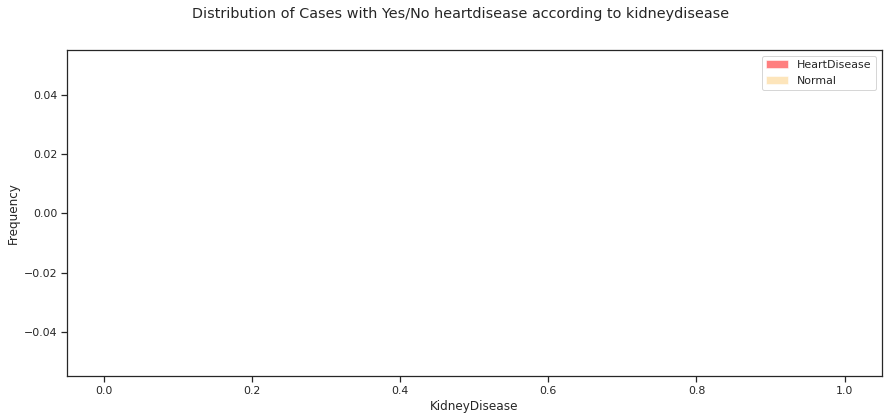

In [43]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["KidneyDisease"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["KidneyDisease"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("KidneyDisease")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to kidneydisease")

ax.legend();

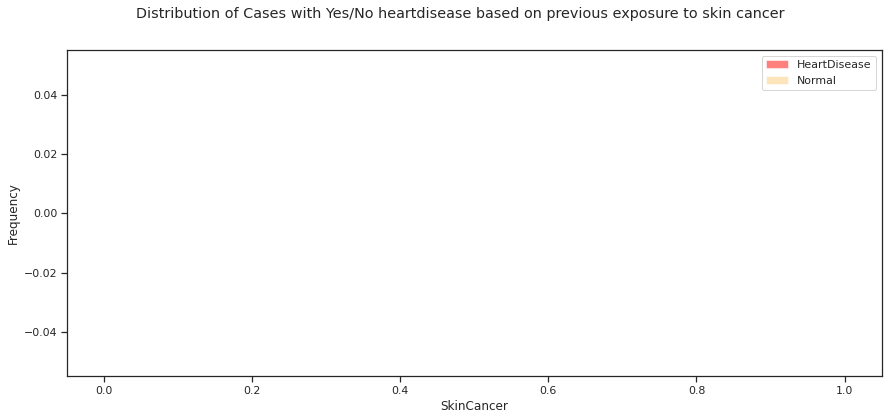

In [44]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["SkinCancer"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["SkinCancer"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("SkinCancer")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No heartdisease based on previous exposure to skin cancer")

ax.legend();

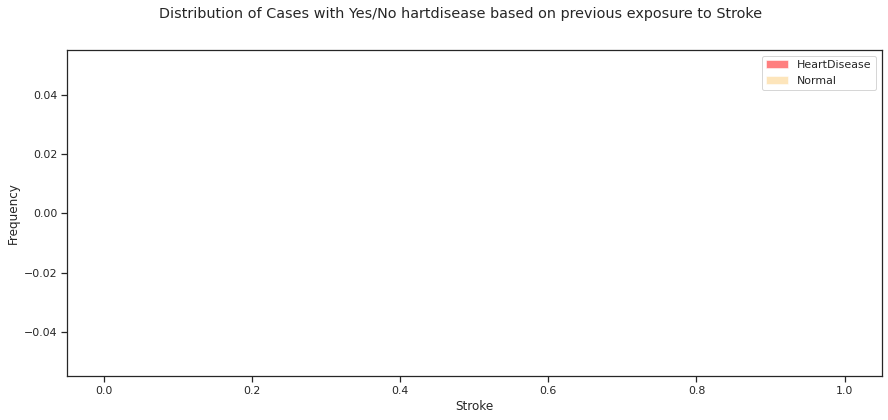

In [45]:
fig, ax = plt.subplots(figsize = (13,6))

ax.hist(data[data["HeartDisease"]==1]["Stroke"], bins=15, alpha=0.5, color="red", label="HeartDisease")
ax.hist(data[data["HeartDisease"]==0]["Stroke"], bins=15, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")

fig.suptitle("Distribution of Cases with Yes/No hartdisease based on previous exposure to Stroke")

ax.legend();

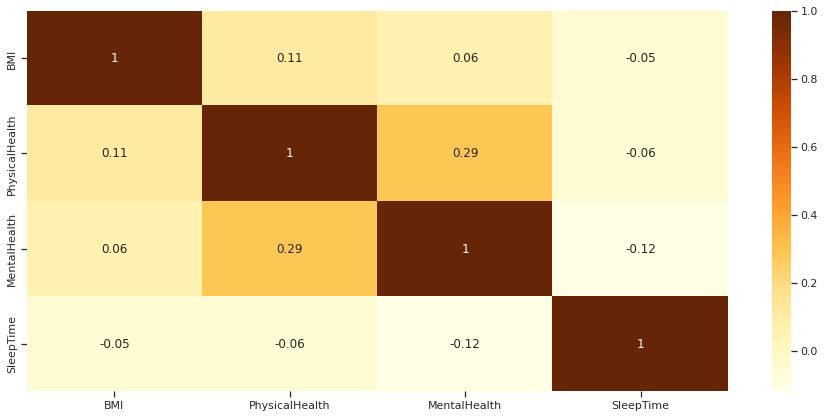

In [46]:
#Visualization Of Numerical Features
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

No handles with labels found to put in legend.


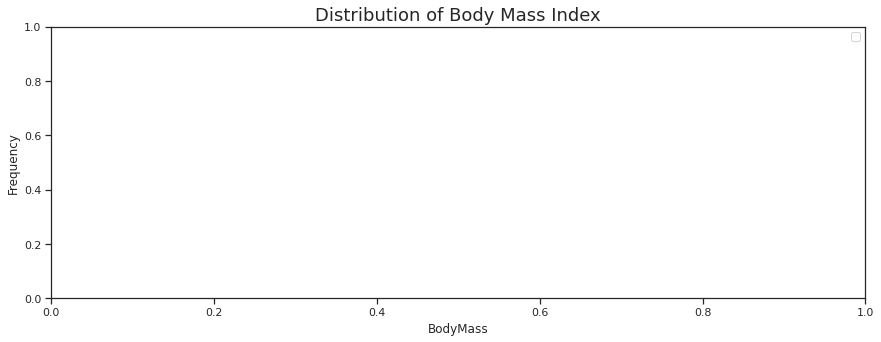

In [47]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(data[data["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 18)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

No handles with labels found to put in legend.


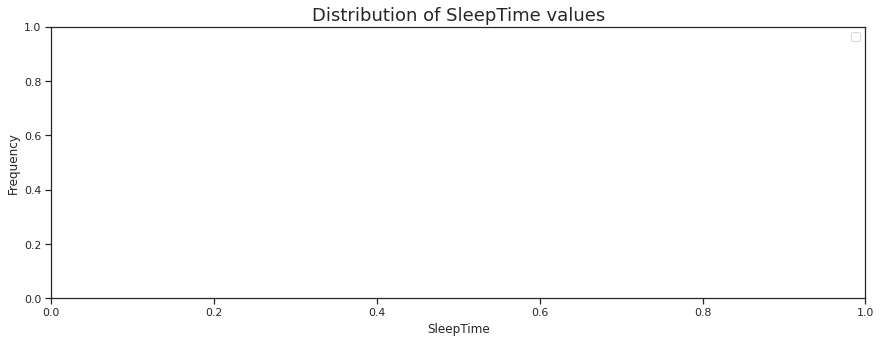

In [48]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(data[data["HeartDisease"]==1]["SleepTime"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]==0]["SleepTime"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of SleepTime values', fontsize = 18)
ax.set_xlabel("SleepTime")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

No handles with labels found to put in legend.


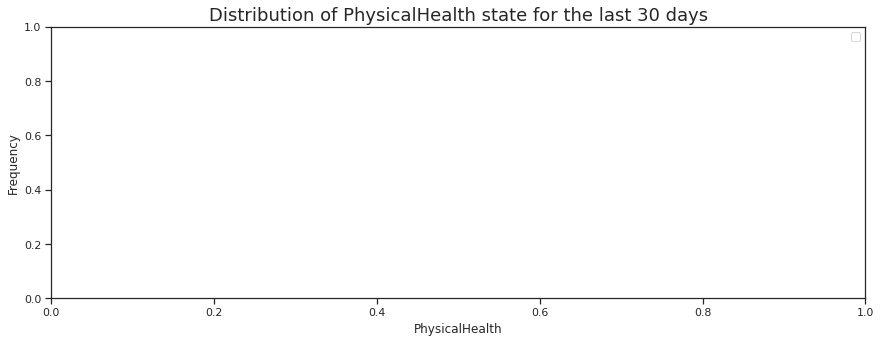

In [49]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(data[data["HeartDisease"]==1]["PhysicalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]==0]["PhysicalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of PhysicalHealth state for the last 30 days', fontsize = 18) # Read the introduction to know what the scale of numerical features mean
ax.set_xlabel("PhysicalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

No handles with labels found to put in legend.


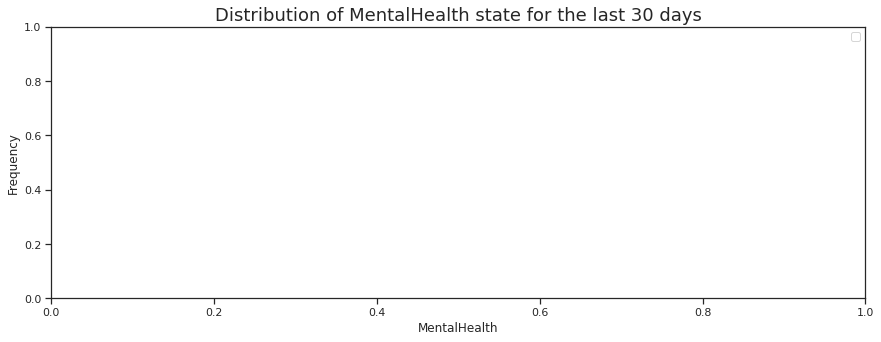

In [50]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(data[data["HeartDisease"]==1]["MentalHealth"], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(data[data["HeartDisease"]==0]["MentalHealth"], alpha=0.5,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of MentalHealth state for the last 30 days', fontsize = 18)
ax.set_xlabel("MentalHealth")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()